In [ ]:
#David Kloepper
#Data Visualization Bootcamp, Cohort 3
#July 27th, 2019

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [3]:
#assign x and y values
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

print(X.shape, y.shape)

(8744, 40) (8744,)


In [4]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [5]:
#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [6]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
5964,1,0,0,0,252.044440,0.027490,-0.027490,265.2010,0.0494,-0.0494,...,-136.0,4.621,0.041,-0.035,0.664,0.057,-0.059,292.79022,41.948639,15.884
9410,1,0,0,0,371.518520,0.015790,-0.015790,317.6836,0.0339,-0.0339,...,-206.0,4.377,0.101,-0.203,1.089,0.364,-0.145,293.06400,45.034210,13.731
4204,0,0,1,0,8.038670,0.000114,-0.000114,135.3098,0.0123,-0.0123,...,-181.0,4.485,0.050,-0.200,0.975,0.282,-0.101,290.51785,41.238762,14.999
5933,0,0,0,0,18.782160,0.000406,-0.000406,147.8508,0.0148,-0.0148,...,-167.0,4.488,0.048,-0.290,0.940,0.386,-0.087,291.76413,41.860130,14.043
6996,1,0,1,0,12.429716,0.000472,-0.000472,141.2846,0.0420,-0.0420,...,-200.0,4.534,0.037,-0.213,0.905,0.281,-0.088,297.52072,40.585419,15.842


# Pre-processing

Scale the data using the MinMaxScaler

In [7]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\dkloe\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Train the Support Vector Machine - Linear Kernel

In [8]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8479719426654467
Testing Data Score: 0.8462946020128088


# Hyperparameter Tuning

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [10]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 25, 50, 100, 250],
              'gamma': [0.00005, 0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [11]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=10, gamma=5e-05 ...............................................


C:\Users\dkloe\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=10, gamma=5e-05, score=0.8651120256058528, total=   0.6s
[CV] C=10, gamma=5e-05 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ...... C=10, gamma=5e-05, score=0.8746569075937786, total=   0.5s
[CV] C=10, gamma=5e-05 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s


[CV] ...... C=10, gamma=5e-05, score=0.8672768878718535, total=   0.5s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.8651120256058528, total=   0.6s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.8746569075937786, total=   0.5s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.8672768878718535, total=   0.5s
[CV] C=10, gamma=0.0005 ..............................................
[CV] ..... C=10, gamma=0.0005, score=0.8651120256058528, total=   0.6s
[CV] C=10, gamma=0.0005 ..............................................
[CV] ..... C=10, gamma=0.0005, score=0.8746569075937786, total=   0.5s
[CV] C=10, gamma=0.0005 ..............................................
[CV] ..... C=10, gamma=0.0005, score=0.8672768878718535, total=   0.5s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ..... C=250, gamma=5e-05, score=0.8824874256973022, total=   2.5s
[CV] C=250, gamma=5e-05 ..............................................
[CV] ..... C=250, gamma=5e-05, score=0.8975297346752058, total=   1.3s
[CV] C=250, gamma=5e-05 ..............................................
[CV] ....... C=250, gamma=5e-05, score=0.88558352402746, total=   2.1s
[CV] C=250, gamma=0.0001 .............................................
[CV] .... C=250, gamma=0.0001, score=0.8824874256973022, total=   2.5s
[CV] C=250, gamma=0.0001 .............................................
[CV] .... C=250, gamma=0.0001, score=0.8975297346752058, total=   1.3s
[CV] C=250, gamma=0.0001 .............................................
[CV] ...... C=250, gamma=0.0001, score=0.88558352402746, total=   2.1s
[CV] C=250, gamma=0.0005 .............................................
[CV] .... C=250, gamma=0.0005, score=0.8824874256973022, total=   2.5s
[CV] C=250, gamma=0.0005 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  1.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [10, 25, 50, 100, 250], 'gamma': [5e-05, 0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [12]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 250, 'gamma': 5e-05}
0.8885330893565111


# Train the Support Vector Machine - Polynomial Kernel

In [13]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model2 = SVC(kernel='poly')
model2.fit(X_train_scaled, y_train)

C:\Users\dkloe\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.7377249161329674
Testing Data Score: 0.7397072278133577


In [15]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [5, 10, 25, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [16]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=5, gamma=0.0001 ...............................................


C:\Users\dkloe\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=5, gamma=0.0001, score=0.4983996342021033, total=   1.8s
[CV] C=5, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] ..... C=5, gamma=0.0001, score=0.49817017383348583, total=   1.8s
[CV] C=5, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.4s remaining:    0.0s


[CV] ...... C=5, gamma=0.0001, score=0.4983981693363844, total=   1.8s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.4983996342021033, total=   1.8s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ..... C=5, gamma=0.0005, score=0.49817017383348583, total=   1.8s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.4983981693363844, total=   1.8s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.4983996342021033, total=   1.8s
[CV] C=5, gamma=0.001 ................................................
[CV] ...... C=5, gamma=0.001, score=0.49817017383348583, total=   1.7s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.4983981693363844, total=   1.7s
[CV] C=5, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [5, 10, 25, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.005}
0.7346752058554438


# Train the Support Vector Machine - RBF Kernel

In [18]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model3 = SVC(kernel='rbf', gamma=2)
model3.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
print(f"Training Data Score: {model3.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model3.score(X_test_scaled, y_test)}")

Training Data Score: 0.8659652333028363
Testing Data Score: 0.8604757548032936


In [20]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [5, 10, 25, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model3, param_grid, verbose=3)

In [21]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=5, gamma=0.0001 ...............................................


C:\Users\dkloe\Anaconda3\envs\PythonWebMongo\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=5, gamma=0.0001, score=0.4983996342021033, total=   2.5s
[CV] C=5, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ..... C=5, gamma=0.0001, score=0.49817017383348583, total=   2.4s
[CV] C=5, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV] ...... C=5, gamma=0.0001, score=0.4983981693363844, total=   2.4s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ....... C=5, gamma=0.0005, score=0.735711019661637, total=   2.3s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.7378774016468436, total=   2.3s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.7395881006864988, total=   2.4s
[CV] C=5, gamma=0.001 ................................................
[CV] ........ C=5, gamma=0.001, score=0.735711019661637, total=   1.8s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7378774016468436, total=   1.8s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7395881006864988, total=   1.9s
[CV] C=5, gamma=0.005 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  2.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [5, 10, 25, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [22]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.005}
0.8315035071668192


# KNN

In [24]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.797
k: 3, Train/Test Score: 0.896/0.813
k: 5, Train/Test Score: 0.873/0.814
k: 7, Train/Test Score: 0.864/0.819
k: 9, Train/Test Score: 0.859/0.822
k: 11, Train/Test Score: 0.852/0.817
k: 13, Train/Test Score: 0.848/0.819
k: 15, Train/Test Score: 0.844/0.822
k: 17, Train/Test Score: 0.844/0.821
k: 19, Train/Test Score: 0.843/0.823
k: 21, Train/Test Score: 0.840/0.819
k: 23, Train/Test Score: 0.839/0.822
k: 25, Train/Test Score: 0.836/0.824
k: 27, Train/Test Score: 0.836/0.823
k: 29, Train/Test Score: 0.834/0.827
k: 31, Train/Test Score: 0.832/0.826
k: 33, Train/Test Score: 0.832/0.824
k: 35, Train/Test Score: 0.831/0.826
k: 37, Train/Test Score: 0.831/0.827
k: 39, Train/Test Score: 0.828/0.827
k: 41, Train/Test Score: 0.829/0.824
k: 43, Train/Test Score: 0.829/0.826
k: 45, Train/Test Score: 0.830/0.823
k: 47, Train/Test Score: 0.830/0.821
k: 49, Train/Test Score: 0.829/0.820


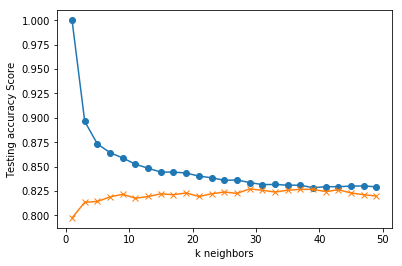

In [30]:
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [32]:
knn = KNeighborsClassifier(n_neighbors=39)
model4 = knn.fit(X_train_scaled, y_train)
print('k=39 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=39 Test Acc: 0.827
